In [6]:
#some k-fold code adapted from:
#https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-k-fold-cross-validation-with-keras.md

import numpy as np
import os
from tensorflow import keras
from tensorflow.keras import layers

notebook_path = 'path\\to\\where\\inputfiles\\are'

num_classes = 4
input_shape = (225, 1)
batch_size  = 32
epochs = 1000
num_iter = 1 #in case you want to run more than one iteration and take an average to reduce variance

trainin = open(notebook_path+'all_trainin.txt', 'r') #already appended with bias value
trainout = open(notebook_path+'all_trainout.txt', 'r')
testin = open(notebook_path+'all_testin.txt', 'r')
testout = open(notebook_path+'all_testout.txt', 'r')

trainin_matrix = np.zeros((0, 225))
trainout_matrix = np.zeros((0, 4))
testin_matrix = np.zeros((0, 225))
testout_matrix = np.zeros((0, 4))

while True:
    inline = trainin.readline()
    outline = trainout.readline()
    if not inline or inline == '':
        break
    in_num = [float(numeric_string) for numeric_string in inline.split()]
    out_num = [float(numeric_string) for numeric_string in outline.split()]
    trainin_matrix = np.append(trainin_matrix,[in_num], axis=0)
    trainout_matrix = np.append(trainout_matrix,[out_num], axis=0)

while True:
    inline = testin.readline()
    outline = testout.readline()
    if not inline or inline == '':
        break
    in_num = [float(numeric_string) for numeric_string in inline.split()]
    out_num = [float(numeric_string) for numeric_string in outline.split()]
    testin_matrix = np.append(testin_matrix,[in_num], axis=0)
    testout_matrix = np.append(testout_matrix,[out_num], axis=0)

trainin_matrix = trainin_matrix.reshape(trainin_matrix.shape[0],trainin_matrix.shape[1], 1, 1)
testin_matrix = testin_matrix.reshape(testin_matrix.shape[0],testin_matrix.shape[1], 1, 1)

print(trainin_matrix.shape)
print(trainout_matrix.shape)
print(testin_matrix.shape)
print(testout_matrix.shape)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv1D(32, kernel_size=3, activation="relu", use_bias=False),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(64, kernel_size=3, activation="relu", use_bias=False),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

avg = 0

history = ''
for i in range(num_iter):
    

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    history = model.fit(trainin_matrix, trainout_matrix, batch_size=batch_size, epochs=epochs, validation_split=0.1)

    score = model.evaluate(testin_matrix, testout_matrix, verbose=0)

    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    
    avg += float(score[1])

avg /= num_iter


(2346, 225, 1, 1)
(2346, 4)
(807, 225, 1, 1)
(807, 4)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 223, 32)           96        
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 111, 32)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 109, 64)           6144      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 54, 64)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3456)              0         
                                                                 


66/66 [==============================] - 0s 7ms/step - loss: 8696.8369 - accuracy: 0.3254 - val_loss: 11172.0381 - val_accuracy: 0.3234
Epoch 47/1000
66/66 [==============================] - 0s 6ms/step - loss: 8293.7148 - accuracy: 0.3434 - val_loss: 12811.5703 - val_accuracy: 0.3234
Epoch 48/1000
66/66 [==============================] - 0s 6ms/step - loss: 9216.3652 - accuracy: 0.3520 - val_loss: 12895.9658 - val_accuracy: 0.3234
Epoch 49/1000
66/66 [==============================] - 0s 6ms/step - loss: 9119.7871 - accuracy: 0.3534 - val_loss: 12275.5576 - val_accuracy: 0.4213
Epoch 50/1000
66/66 [==============================] - 0s 6ms/step - loss: 9682.2061 - accuracy: 0.3316 - val_loss: 10731.7959 - val_accuracy: 0.2936
Epoch 51/1000
66/66 [==============================] - 0s 6ms/step - loss: 9932.4082 - accuracy: 0.3396 - val_loss: 13195.9404 - val_accuracy: 0.4213
Epoch 52/1000
66/66 [==============================] - 0s 6ms/step - loss: 10465.3320 - accuracy: 0.3515 - val_los

Epoch 154/1000
66/66 [==============================] - 0s 6ms/step - loss: 52413.6367 - accuracy: 0.3373 - val_loss: 74037.5859 - val_accuracy: 0.3234
Epoch 155/1000
66/66 [==============================] - 0s 7ms/step - loss: 55530.3672 - accuracy: 0.3254 - val_loss: 80566.6016 - val_accuracy: 0.3234
Epoch 156/1000
66/66 [==============================] - 0s 6ms/step - loss: 55570.0703 - accuracy: 0.3330 - val_loss: 74348.3906 - val_accuracy: 0.3234
Epoch 157/1000
66/66 [==============================] - 0s 7ms/step - loss: 55047.0938 - accuracy: 0.3406 - val_loss: 94860.5312 - val_accuracy: 0.3234
Epoch 158/1000
66/66 [==============================] - 0s 7ms/step - loss: 52956.9453 - accuracy: 0.3472 - val_loss: 79292.5938 - val_accuracy: 0.3234
Epoch 159/1000
66/66 [==============================] - 0s 7ms/step - loss: 56693.2695 - accuracy: 0.3406 - val_loss: 98525.4141 - val_accuracy: 0.3234
Epoch 160/1000
66/66 [==============================] - 0s 7ms/step - loss: 60436.6836 -

Epoch 208/1000
66/66 [==============================] - 0s 6ms/step - loss: 102605.2188 - accuracy: 0.3297 - val_loss: 162610.3906 - val_accuracy: 0.3234
Epoch 209/1000
66/66 [==============================] - 0s 6ms/step - loss: 88898.8672 - accuracy: 0.3444 - val_loss: 148390.9375 - val_accuracy: 0.3234
Epoch 210/1000
66/66 [==============================] - 0s 6ms/step - loss: 87125.4062 - accuracy: 0.3648 - val_loss: 146076.5938 - val_accuracy: 0.4213
Epoch 211/1000
66/66 [==============================] - 0s 6ms/step - loss: 89842.8125 - accuracy: 0.3344 - val_loss: 142175.5938 - val_accuracy: 0.2936
Epoch 212/1000
66/66 [==============================] - 0s 6ms/step - loss: 93247.1797 - accuracy: 0.3288 - val_loss: 152730.1406 - val_accuracy: 0.4213
Epoch 213/1000
66/66 [==============================] - 0s 6ms/step - loss: 91078.1094 - accuracy: 0.3411 - val_loss: 120118.1953 - val_accuracy: 0.3234
Epoch 214/1000
66/66 [==============================] - 0s 6ms/step - loss: 87536

66/66 [==============================] - 0s 6ms/step - loss: 163749.8438 - accuracy: 0.3434 - val_loss: 239832.7812 - val_accuracy: 0.2936
Epoch 315/1000
66/66 [==============================] - 0s 6ms/step - loss: 174925.1875 - accuracy: 0.3330 - val_loss: 333017.3125 - val_accuracy: 0.3234
Epoch 316/1000
66/66 [==============================] - 0s 6ms/step - loss: 183306.4844 - accuracy: 0.3510 - val_loss: 340164.6250 - val_accuracy: 0.3234
Epoch 317/1000
66/66 [==============================] - 0s 6ms/step - loss: 170032.4531 - accuracy: 0.3235 - val_loss: 287135.5938 - val_accuracy: 0.3234
Epoch 318/1000
66/66 [==============================] - 0s 7ms/step - loss: 174479.4688 - accuracy: 0.3330 - val_loss: 319576.2500 - val_accuracy: 0.3234
Epoch 319/1000
66/66 [==============================] - 0s 7ms/step - loss: 178793.5625 - accuracy: 0.3188 - val_loss: 229765.4531 - val_accuracy: 0.4213
Epoch 320/1000
66/66 [==============================] - 0s 6ms/step - loss: 192408.2500 - a

66/66 [==============================] - 0s 6ms/step - loss: 288941.9062 - accuracy: 0.3439 - val_loss: 646963.1875 - val_accuracy: 0.3234
Epoch 421/1000
66/66 [==============================] - 0s 7ms/step - loss: 279968.9375 - accuracy: 0.3524 - val_loss: 456604.8750 - val_accuracy: 0.2936
Epoch 422/1000
66/66 [==============================] - 0s 6ms/step - loss: 271652.1250 - accuracy: 0.3420 - val_loss: 610750.6250 - val_accuracy: 0.3234
Epoch 423/1000
66/66 [==============================] - 0s 6ms/step - loss: 277517.3438 - accuracy: 0.3449 - val_loss: 471723.0312 - val_accuracy: 0.3234
Epoch 424/1000
66/66 [==============================] - 0s 6ms/step - loss: 292329.9375 - accuracy: 0.3434 - val_loss: 456529.6875 - val_accuracy: 0.3234
Epoch 425/1000
66/66 [==============================] - 0s 7ms/step - loss: 274223.7812 - accuracy: 0.3430 - val_loss: 380439.9688 - val_accuracy: 0.3234
Epoch 426/1000
66/66 [==============================] - 0s 6ms/step - loss: 296605.2812 - a

66/66 [==============================] - 0s 6ms/step - loss: 393286.3438 - accuracy: 0.3378 - val_loss: 590050.5625 - val_accuracy: 0.4213
Epoch 527/1000
66/66 [==============================] - 0s 7ms/step - loss: 380681.0938 - accuracy: 0.3534 - val_loss: 624134.5625 - val_accuracy: 0.4213
Epoch 528/1000
66/66 [==============================] - 0s 6ms/step - loss: 411905.3438 - accuracy: 0.3245 - val_loss: 683955.7500 - val_accuracy: 0.3234
Epoch 529/1000
66/66 [==============================] - 0s 6ms/step - loss: 391588.8125 - accuracy: 0.3472 - val_loss: 578499.0000 - val_accuracy: 0.4213
Epoch 530/1000
66/66 [==============================] - 0s 6ms/step - loss: 409986.3750 - accuracy: 0.3415 - val_loss: 723318.7500 - val_accuracy: 0.2936
Epoch 531/1000
66/66 [==============================] - 0s 6ms/step - loss: 403857.1562 - accuracy: 0.3619 - val_loss: 842682.2500 - val_accuracy: 0.3234
Epoch 532/1000
66/66 [==============================] - 0s 6ms/step - loss: 415716.5938 - a

66/66 [==============================] - 0s 6ms/step - loss: 518856.3438 - accuracy: 0.3297 - val_loss: 860987.9375 - val_accuracy: 0.3234
Epoch 633/1000
66/66 [==============================] - 0s 6ms/step - loss: 545659.0625 - accuracy: 0.3231 - val_loss: 866704.8750 - val_accuracy: 0.3234
Epoch 634/1000
66/66 [==============================] - 0s 6ms/step - loss: 515364.7500 - accuracy: 0.3496 - val_loss: 906850.0625 - val_accuracy: 0.3234
Epoch 635/1000
66/66 [==============================] - 0s 6ms/step - loss: 523639.2188 - accuracy: 0.3458 - val_loss: 815243.4375 - val_accuracy: 0.3234
Epoch 636/1000
66/66 [==============================] - 0s 7ms/step - loss: 576210.5000 - accuracy: 0.3340 - val_loss: 871171.2500 - val_accuracy: 0.2936
Epoch 637/1000
66/66 [==============================] - 0s 6ms/step - loss: 538623.2500 - accuracy: 0.3591 - val_loss: 834167.8125 - val_accuracy: 0.4213
Epoch 638/1000
66/66 [==============================] - 0s 7ms/step - loss: 561566.5000 - a

66/66 [==============================] - 0s 6ms/step - loss: 711276.4375 - accuracy: 0.3529 - val_loss: 1136287.0000 - val_accuracy: 0.3234
Epoch 739/1000
66/66 [==============================] - 0s 7ms/step - loss: 740590.6875 - accuracy: 0.3321 - val_loss: 1085065.2500 - val_accuracy: 0.3234
Epoch 740/1000
66/66 [==============================] - 0s 6ms/step - loss: 750316.5000 - accuracy: 0.3344 - val_loss: 1028126.5000 - val_accuracy: 0.4213
Epoch 741/1000
66/66 [==============================] - 0s 7ms/step - loss: 756118.0000 - accuracy: 0.3420 - val_loss: 1402714.3750 - val_accuracy: 0.3234
Epoch 742/1000
66/66 [==============================] - 0s 6ms/step - loss: 778125.0625 - accuracy: 0.3368 - val_loss: 1150732.0000 - val_accuracy: 0.4213
Epoch 743/1000
66/66 [==============================] - 0s 7ms/step - loss: 751116.8750 - accuracy: 0.3240 - val_loss: 1420841.3750 - val_accuracy: 0.3234
Epoch 744/1000
66/66 [==============================] - 0s 7ms/step - loss: 758515.75

Epoch 791/1000
66/66 [==============================] - 0s 7ms/step - loss: 834567.2500 - accuracy: 0.3188 - val_loss: 1022082.7500 - val_accuracy: 0.3234
Epoch 792/1000
66/66 [==============================] - 0s 7ms/step - loss: 807549.3750 - accuracy: 0.3288 - val_loss: 1380073.1250 - val_accuracy: 0.4213
Epoch 793/1000
66/66 [==============================] - 0s 6ms/step - loss: 821684.0625 - accuracy: 0.3496 - val_loss: 1315957.6250 - val_accuracy: 0.4213
Epoch 794/1000
66/66 [==============================] - 0s 6ms/step - loss: 827340.5625 - accuracy: 0.3543 - val_loss: 1219257.2500 - val_accuracy: 0.3234
Epoch 795/1000
66/66 [==============================] - 0s 6ms/step - loss: 793869.1875 - accuracy: 0.3458 - val_loss: 993436.8750 - val_accuracy: 0.3234
Epoch 796/1000
66/66 [==============================] - 0s 6ms/step - loss: 808457.0000 - accuracy: 0.3382 - val_loss: 1038562.5625 - val_accuracy: 0.4213
Epoch 797/1000
66/66 [==============================] - 0s 6ms/step - l

Epoch 844/1000
66/66 [==============================] - 0s 6ms/step - loss: 912131.7500 - accuracy: 0.3131 - val_loss: 1785943.1250 - val_accuracy: 0.3234
Epoch 845/1000
66/66 [==============================] - 0s 6ms/step - loss: 922485.2500 - accuracy: 0.3444 - val_loss: 1118277.7500 - val_accuracy: 0.3234
Epoch 846/1000
66/66 [==============================] - 0s 6ms/step - loss: 976037.4375 - accuracy: 0.3572 - val_loss: 1107453.8750 - val_accuracy: 0.4213
Epoch 847/1000
66/66 [==============================] - 0s 6ms/step - loss: 910634.3125 - accuracy: 0.3411 - val_loss: 1472982.6250 - val_accuracy: 0.3234
Epoch 848/1000
66/66 [==============================] - 0s 6ms/step - loss: 939045.3750 - accuracy: 0.3430 - val_loss: 1240373.3750 - val_accuracy: 0.3234
Epoch 849/1000
66/66 [==============================] - 0s 6ms/step - loss: 972162.6250 - accuracy: 0.3306 - val_loss: 1263633.3750 - val_accuracy: 0.3234
Epoch 850/1000
66/66 [==============================] - 0s 6ms/step - 

Epoch 897/1000
66/66 [==============================] - 0s 6ms/step - loss: 988948.2500 - accuracy: 0.3463 - val_loss: 1630739.6250 - val_accuracy: 0.3234
Epoch 898/1000
66/66 [==============================] - 0s 6ms/step - loss: 1033351.3125 - accuracy: 0.3453 - val_loss: 1654139.1250 - val_accuracy: 0.3234
Epoch 899/1000
66/66 [==============================] - 0s 6ms/step - loss: 983116.6250 - accuracy: 0.3567 - val_loss: 1558057.3750 - val_accuracy: 0.3234
Epoch 900/1000
66/66 [==============================] - 0s 7ms/step - loss: 991560.8750 - accuracy: 0.3259 - val_loss: 1505201.6250 - val_accuracy: 0.3234
Epoch 901/1000
66/66 [==============================] - 0s 6ms/step - loss: 1116854.6250 - accuracy: 0.3449 - val_loss: 1194733.5000 - val_accuracy: 0.3234
Epoch 902/1000
66/66 [==============================] - 0s 6ms/step - loss: 1020995.4375 - accuracy: 0.3449 - val_loss: 1740207.3750 - val_accuracy: 0.3234
Epoch 903/1000
66/66 [==============================] - 0s 6ms/step

In [50]:
model.predict(np.array([testin_matrix[374],]))

array([[0., 0., 1., 0.]], dtype=float32)

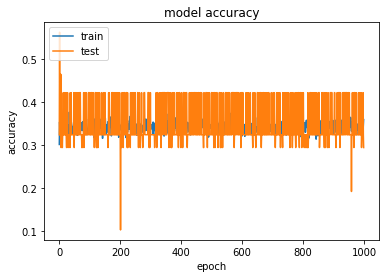

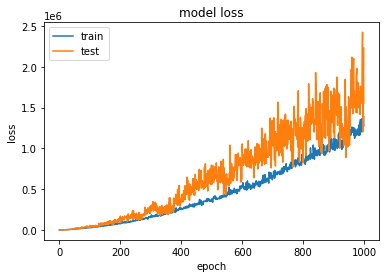

In [7]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
print(np.mean(history.history['accuracy']))
print(np.mean(history.history['val_accuracy']))
print(np.mean(history.history['loss']))
print(np.mean(history.history['val_loss']))

0.3418981530666351
0.35048510487377643
457797.0471553392
676737.8800392216


In [9]:
print(history.history['accuracy'][999])
print(history.history['val_accuracy'][999])
print(history.history['loss'][999])
print(history.history['val_loss'][999])

0.3585978150367737
0.29361701011657715
1277279.625
1553429.75
